## Credit Card Payment Default Prediction With Leras [Deep Learning]

### dataset is downloaded from UCI Machine Learning Repository, with default payment in Taiwan
### We focus on last column [default payment next month]. A value of 1 means a default occurred

In [10]:
import pandas as pd
df=pd.read_csv('default.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [12]:
# split and scale the data
feature_columns=df.columns[:-1]
features=df.loc[:,feature_columns]
target=df.loc[:,'default payment next month']

In [14]:
# split into training and testing datasets
from sklearn.model_selection import train_test_split
train_features,test_features,train_target,test_target=train_test_split(features,target,test_size=0.2,random_state=0)
# test_size=0.2 means we include 20% of inputs in test split
import numpy as np
train_x,train_y=np.array(train_features),np.array(train_target)
test_x,test_y=np.array(test_features),np.array(test_target)

In [15]:
# standardize the dataset by scaling the features
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train_scaled_x=scaler.fit_transform(train_x)
test_scaled_x=scaler.transform(test_x)

### Design a Deep Neural Network with Five Hidden Layers using Keras

In [18]:
# create a sequential model
# add layers, here we use ReLU activation 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.normalization import BatchNormalization

num_features = train_scaled_x.shape[1]

model = Sequential()
model.add(Dense(80, input_dim=num_features, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(80, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(40, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 80)                1920      
_________________________________________________________________
dropout_2 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 80)                6480      
_________________________________________________________________
dropout_3 (Dropout)          (None, 80)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 40)                3240      
_________________________________________________________________
batch_normalization_1 (Batch (None, 40)                160       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [30]:
# using Adam Optimizer, producing accuracy metrix
import tensorflow as tf
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [31]:
# train the model
from keras.callbacks import History
callback_history=History()
model.fit(train_scaled_x,train_y,validation_split=0.2,epochs=100,callbacks=[callback_history])

Epoch 1/100
600/600 [==============================] - 2s 2ms/step - loss: 0.5590 - accuracy: 0.7316 - val_loss: 0.4792 - val_accuracy: 0.7898
Epoch 2/100
600/600 [==============================] - 1s 2ms/step - loss: 0.4749 - accuracy: 0.8041 - val_loss: 0.4893 - val_accuracy: 0.7896
Epoch 3/100
600/600 [==============================] - 1s 2ms/step - loss: 0.4573 - accuracy: 0.8113 - val_loss: 0.4661 - val_accuracy: 0.8017
Epoch 4/100
600/600 [==============================] - 1s 2ms/step - loss: 0.4564 - accuracy: 0.8077 - val_loss: 0.4552 - val_accuracy: 0.8083
Epoch 5/100
600/600 [==============================] - 1s 2ms/step - loss: 0.4581 - accuracy: 0.8073 - val_loss: 0.4529 - val_accuracy: 0.8115
Epoch 6/100
600/600 [==============================] - 1s 2ms/step - loss: 0.4582 - accuracy: 0.8063 - val_loss: 0.4579 - val_accuracy: 0.8119
Epoch 7/100
600/600 [==============================] - 1s 2ms/step - loss: 0.4437 - accuracy: 0.8187 - val_loss: 0.4483 - val_accuracy: 0.8150

### Measuring the Performance with Risk Metrics

In [32]:
# loss and accuracy
test_loss,test_acc=model.evaluate(test_scaled_x,test_y)
print('Test loss:',test_loss)
print('Test accuracy',test_acc)


188/188 [==============================] - 0s 1ms/step - loss: 0.4289 - accuracy: 0.8247
Test loss: 0.42891252040863037
Test accuracy 0.8246666789054871


In [33]:
# round data to the nearest 0 or 1 to obtain the binary classification label
predictions=model.predict(test_scaled_x)
pred_values=predictions.round().ravel()

Text(0.5, 1.0, 'Credit card payment default prediction')

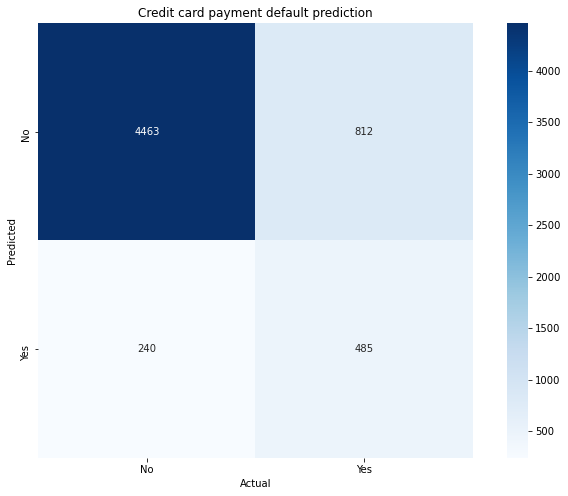

In [34]:
# plot confusion matrix
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(test_y,pred_values)
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
flags=['No','Yes']
plt.subplots(figsize=(12,8))
sns.heatmap(matrix.T,square=True,annot=True,fmt='g',cbar=True,cmap=plt.cm.Blues,xticklabels=flags,yticklabels=flags)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Credit card payment default prediction')

In [35]:
# display multiple risk matrix
from sklearn.metrics import (accuracy_score,precision_score,recall_score,f1_score)
actual,predicted=test_y,pred_values
print('accuracy_score:',accuracy_score(actual,predicted))
print('precision_score:',precision_score(actual,predicted))
print('recall score:',recall_score(actual,predicted))
print('f1 score:',f1_score(actual,predicted))


accuracy_score: 0.8246666666666667
precision_score: 0.6689655172413793
recall score: 0.37393986121819583
f1 score: 0.4797230464886251


In [36]:
# the low recall score and slightly below0average F1 score suggest that the model is not competitative
# so we need to visit historical metrics

### Displaying Recorded Events in Keras History

In [44]:
train_acc = callback_history.history['accuracy']
val_acc = callback_history.history['val_accuracy']
train_loss = callback_history.history['loss']
val_loss = callback_history.history['val_loss']

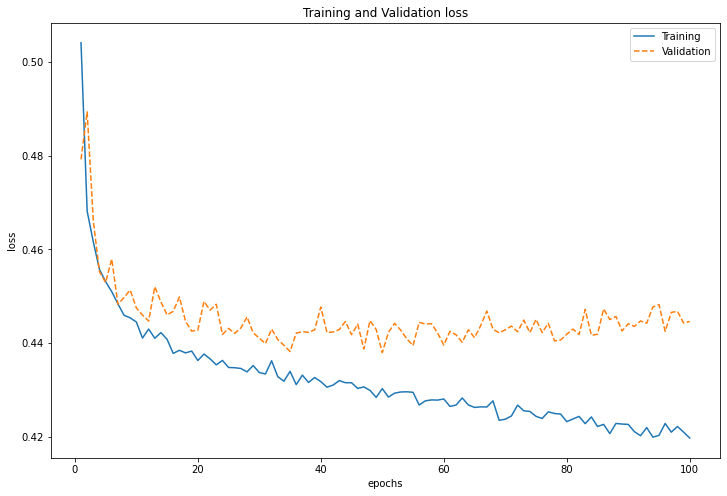

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
epochs=range(1,len(train_acc)+1)

plt.figure(figsize=(12,8))
plt.plot(epochs,train_loss,label='Training')
plt.plot(epochs,val_loss,'--',label='Validation')
plt.title('Training and Validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend();

In [47]:
# the solid line shows the the training loss decreases as epoches increase, meaning the model learns data better over time

In [48]:
# the dashed line shows the validation loss increases as epoches increase, meaning the model is not generalized well on validation set

In [49]:
# these trend suggests an overfitting

### Plot the Training and Validation Accuracy

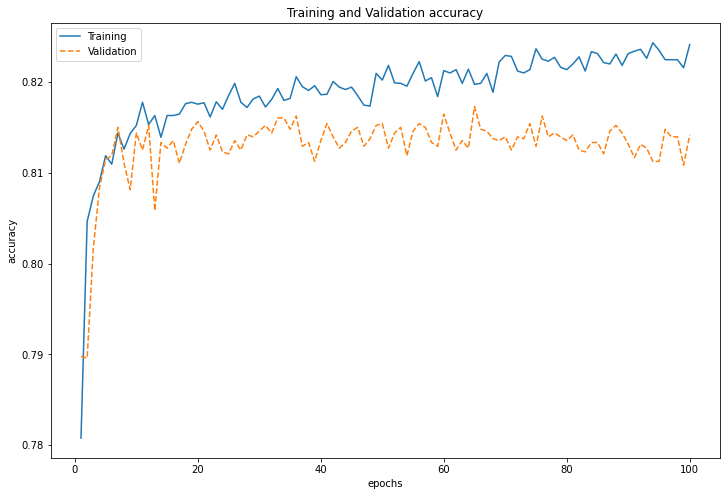

In [51]:
plt.figure(figsize=(12,8))
plt.plot(epochs,train_acc,'-',label='Training')
plt.plot(epochs,val_acc,'--',label='Validation')
plt.title('Training and Validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend();

In [52]:
# the solid line suggests training accuracy increases as epoches increase
# the dashed line suggests validation accuracy decreasing
# These suggests an overfitting
# to fix it, we may use more training data, reduce capacity of network, add weight regularization or use a fropout layer